In [1]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('../cmake-build-release')

import pymgodpl as mg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

In [2]:
rm = mg.load_robot_model(1.0)

[INFO] [1699971928.070901716] [moveit_robot_model.robot_model]: Loading robot model 'aerial_manipulator_drone'...
[WARN] [1699971928.070965476] [moveit_robot_model.robot_model]: Link end_effector has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[WARN] [1699971928.071009098] [moveit_robot_model.robot_model]: Could not identify parent group for end-effector 'end_effector'


In [3]:
trees = mg.load_all_tree_meshes()

Removed 2700 out of 5400 fruit meshes that were too small from model peachtree2
Removed 600 out of 1200 fruit meshes that were too small from model nectarinetree3
Removed 1250 out of 2500 fruit meshes that were too small from model lemontree4
Removed 25 out of 50 fruit meshes that were too small from model orangetree2
Removed 50 out of 100 fruit meshes that were too small from model lemontree1
Removed 200 out of 400 fruit meshes that were too small from model lemontree2
Removed 300 out of 600 fruit meshes that were too small from model orangetree4
Removed 1300 out of 2600 fruit meshes that were too small from model nectarinetree4
Removed 20 out of 40 fruit meshes that were too small from model orangetree1
Removed 100 out of 200 fruit meshes that were too small from model nectarinetree2
Removed 100 out of 200 fruit meshes that were too small from model nectarinetree1
Removed 9000 out of 18000 fruit meshes that were too small from model peachtree4
Removed 75 out of 150 fruit meshes that 

In [4]:
sample_data = []
N_TRIALS = 1000
MAX_FRUIT = 500

for tree in trees:
    
    fruit = tree.fruit_positions()
    
    print(f'Starting tree: {tree.name} with {len(fruit)} fruit')
    
    if len(fruit) > MAX_FRUIT:
        fruit = random.sample(fruit, MAX_FRUIT)
    
    cd = mg.CollisionDetection([tree.trunk], rm)
    
    for (fruit_i, fruit) in enumerate(fruit):
        
        successes = 0
        
        for sample_i in range(N_TRIALS):

            sample = mg.sample_goal_region(fruit, random.randint(0, 100000), rm)
            collides = cd.collides(sample)
            
            if not collides:
                successes += 1
                
        sample_data.append({'tree':tree.name, 'successes':successes})
    
    print('Done with tree: ', tree.name)
            
sample_data = pd.DataFrame(sample_data)

Starting tree: peachtree2 with 2700 fruit
Done with tree:  peachtree2
Starting tree: nectarinetree3 with 600 fruit
Done with tree:  nectarinetree3
Starting tree: appletree with 165 fruit
Done with tree:  appletree
Starting tree: plumtree3 with 2700 fruit
Done with tree:  plumtree3
Starting tree: peartree1 with 50 fruit
Done with tree:  peartree1
Starting tree: peartree2 with 100 fruit
Done with tree:  peartree2
Starting tree: lemontree4 with 1250 fruit
Done with tree:  lemontree4
Starting tree: peachtree1 with 1800 fruit
Done with tree:  peachtree1
Starting tree: plumtree4 with 6498 fruit
Done with tree:  plumtree4
Starting tree: appletree1 with 16 fruit
Done with tree:  appletree1
Starting tree: orangetree2 with 25 fruit
Done with tree:  orangetree2
Starting tree: orangetree3 with 100 fruit
Done with tree:  orangetree3
Starting tree: appletree3 with 400 fruit
Done with tree:  appletree3
Starting tree: lemontree1 with 50 fruit
Done with tree:  lemontree1
Starting tree: lemontree2 with 

In [7]:
sample_data['success_rate'] = sample_data['successes'] / N_TRIALS

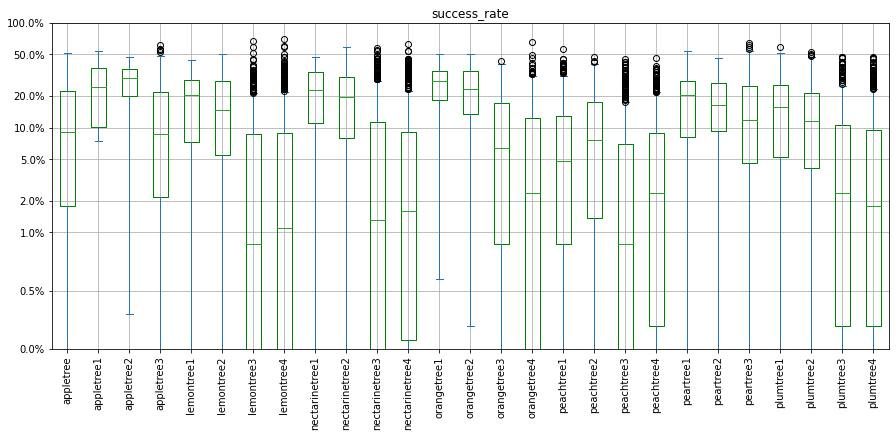

In [8]:
sample_data.reset_index().plot.box(by='tree', column='success_rate', figsize=(15,6), color={'boxes':'green'})
plt.yscale('symlog', linthresh=0.01)
plt.xticks(rotation=90)
yticks = [0,
          #0.001,0.002,0.005,
          0.005,
          0.01,0.02,0.05,
          0.1,0.2,0.5,
          1.0]
plt.yticks(yticks, ['{0:.1f}%'.format(y*100) for y in yticks])
plt.ylim(0,1)
plt.grid()